# Pokémon Insights: Delving into Attribute Data

Welcome to the "**Pokémon Insights: Delving into Attribute Data**" Jupyter Notebook. In this notebook, we will analyze a comprehensive dataset containing various attributes of Pokémon species. Our goal is to uncover insights, patterns, and correlations within the data, providing a deeper understanding of how different attributes influence Pokémon characteristics and evolution.

Throughout this analysis, we'll address the following key questions:

1. **What is the distribution of Pokémon types based on their primary Type?**
2. **How are different stats of Pokémon correlated with each other? Can we identify any strong relationships that might drive further investigation?**
3. **How does the distribution of Attack stats vary among different Pokémon types? Are there any notable differences between Legendary and Non-Legendary Pokémon?**
4. **Are there any trends in the Average BMI across different Pokémon generations?**
5. **What impact does Mega Evolution have on a Pokémon's Base Stat Total (BST)? Is there a significant difference in average BST between Pokémon with and without Mega Evolutions?**
6. **How have the stats of Pokémon evolved across different generations? Are there any general trends or specific anomalies in terms of stats like HP, Attack, Defense, Speed, Special Attack, and Special Defense?**

By exploring these questions through visualizations and statistical tests, we aim to shed light on the intricate world of Pokémon and their attributes. Let's dive in and uncover the hidden insights!


# Prepare Data
First we import essential libraries, load the Pokémon dataset, and gain insights into its structure and contents.

In [89]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt

# Import pokemon dataset

pokemon_data = pd.read_csv("/content/drive/MyDrive/DataPokemon/pokemon_data.csv")


# Display basic information about the dataset
pokemon_data.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [90]:
pokemon_data.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,...,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,...,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,...,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


In [91]:
pokemon_data['Type 1'].value_counts()


Water       131
Normal      114
Grass        91
Bug          81
Psychic      77
Fire         64
Rock         59
Electric     59
Dark         46
Dragon       42
Fighting     42
Ground       41
Ghost        41
Poison       40
Ice          38
Steel        36
Fairy        22
Flying        8
Name: Type 1, dtype: int64

## Data Cleaning
In this phase, we focus on refining the dataset for improved analysis by addressing missing values and standardizing column names. Here's a overview of the steps taken:
- To handle missing values in the *Type 2* column, we utilize fill these gaps with the label *None*.
- The next step involves standardizing column names. We replace spaces within column names with underscores and convert all letters to lowercase.
- We transform abbreviated column names into more descriptive and intuitive versions.
- We utilize the `info()` function and the `.columns` attribute to confirm the changes that were made.


### Dataset Summary:
- The dataset contains information on **1032 Pokémons** across **7 generations**.
- It comprises 44 columns that describe various attributes such as **attack, defense, speed, weight, as well as additional details like legendary status and generation**.
- The data is relatively clean, with minimal missing values primarily found in the *Type 2* column. This can be attributed to not all Pokémon having a secondary type.
- Column names could be standardized by removing spaces, enhancing the dataset's overall clarity and consistency.

In [92]:
# Clean column names
pokemon_data.columns = pokemon_data.columns.str.replace(' ', '_').str.lower()
column_names = {
    'att': 'attack',
    'def': 'defense',
    'spa': 'special_attack',
    'spd': 'special_defense',
    'spe': 'speed',
    'bst': 'base_stat_total',
}
pokemon_data.rename(columns=column_names, inplace=True)

# Test cleaned dataset
pokemon_data.describe()




,number,hp,attack,defense,special_attack,special_defense,speed,base_stat_total,mean,standard_deviation,...,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,height,weight,bmi
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,...,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,...,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,...,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


In [93]:
pokemon_data.columns

Index(['number', 'name', 'type_1', 'type_2', 'abilities', 'hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed',
       'base_stat_total', 'mean', 'standard_deviation', 'generation',
       'experience_type', 'experience_to_level_100', 'final_evolution',
       'catch_rate', 'legendary', 'mega_evolution', 'alolan_form',
       'galarian_form', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fighting',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy', 'height', 'weight',
       'bmi'],
      dtype='object')

## Exploring Data
In this section, we delve into exploring the dataset through visualizations to gain insights into Pokémon types distribution and attribute correlations.

### Pokémon Types Distribution
We start by visualizing the distribution of Pokémon types. This provides an overview of the prevalence of each type within the dataset. The following **bar plot showcases the count of Pokémon by their primary Type 1**.


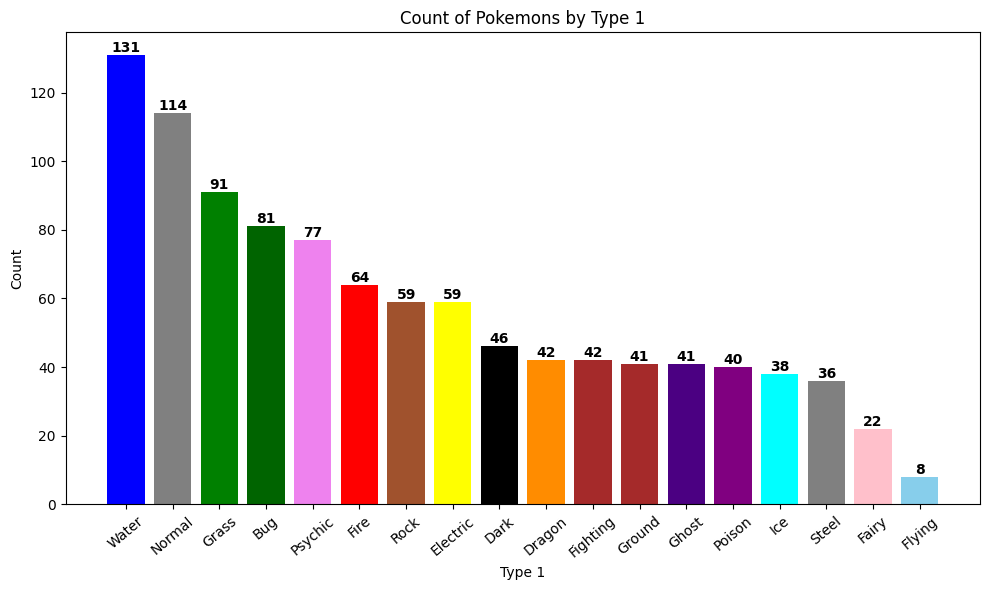

In [115]:
# Define colores específicos para cada tipo
type_colors = {
    'Grass': 'green',
    'Fire': 'red',
    'Water': 'blue',
    'Bug': 'darkgreen',
    'Normal': 'gray',
    'Poison': 'purple',
    'Electric': 'yellow',
    'Ground': 'brown',
    'Fairy': 'pink',
    'Fighting': 'brown',
    'Psychic': 'violet',
    'Rock': 'sienna',
    'Ghost': 'indigo',
    'Ice': 'aqua',
    'Dragon': 'darkorange',
    'Steel': 'gray',
    'Dark': 'black',
    'Flying': 'skyblue'
    # Agrega más tipos y colores según tu necesidad
}


# Pokemon's types distribution
count_by_type = pokemon_data.type_1.value_counts()

# Crea un gráfico de barras con colores específicos
plt.figure(figsize=(10,6))
bar_chart = plt.bar(count_by_type.index, count_by_type.values, color=[type_colors.get(type, 'gray') for type in count_by_type.index])
plt.title("Count of Pokemons by Type 1")
plt.xlabel("Type 1")
plt.ylabel("Count")
plt.xticks(rotation=40)
plt.tight_layout()

for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontweight='bold')

plt.show()

The visualization reveals the distribution of Pokémon types in the dataset. Notably, the types **Water, Normal,** and **Grass** collectively constitute nearly **one-third (32.55%)** of all Pokémon. On the other hand, **Ice, Steel, Fairy,** and **Flying** types are relatively rare, each having fewer than **40 Pokémon**.

### Attribute Correlation Heatmap
Next, we investigate the correlations among various attributes of Pokémon. The correlation heatmap provides a visual representation of the relationships between different stats, such as **HP, Attack, Defense, Special Attack, Speed,** and **Special Defense**. Greener colors indicate stronger positive correlations, while lighter colors signify weaker correlations or no correlation.

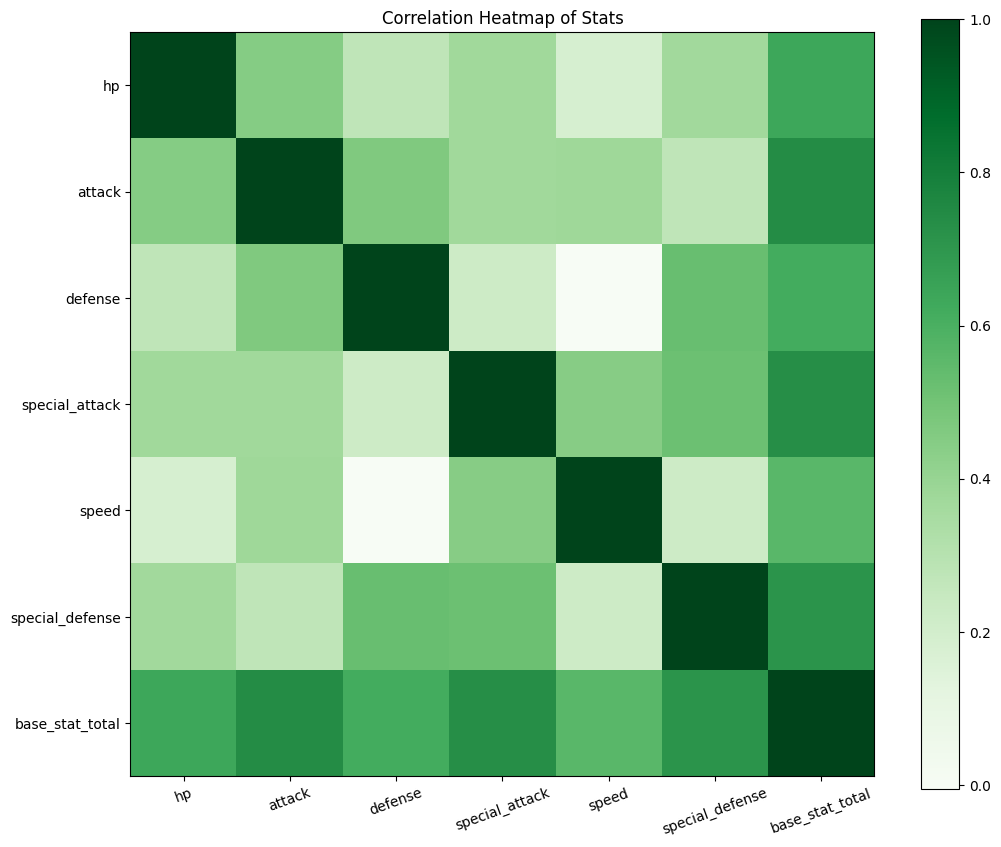

In [117]:
stats = ['hp','attack','defense','special_attack','speed','special_defense','base_stat_total']
corr_matrix = pokemon_data[stats].corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix,  cmap='Greens', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=20)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Heatmap of Stats")
plt.show()

### Observations:
- **HP, Attack** and **Special Attack** are high correlated with Base Stat Total, This suggests that Pokémon with higher values in these attributes tend to have a higher overall strength, as indicated by their base stat total.
- A correlation coefficient of 0 between **Defense** and **Speed** implies that there is no linear relationship or association between these two stats.
-The moderate to weak correlations among the stats indicate that changes in **one stat are not consistently accompanied by proportional changes in another**, allowing for **diverse combinations of strengths and weaknesses** among different Pokémon.

## Insights and Visualizations

Now that we've gained insights into the dataset and explored various attributes, let's delve deeper into specific questions and answer them using data analysis and visualization.

### 1. Exploring Attack and Base Stat Total Relationship

Since we observed a strong correlation between  **Attack** and  **Base Stat Total** in the correlation heatmap, we will  analyze these relationship with a scatter plot and a trend line

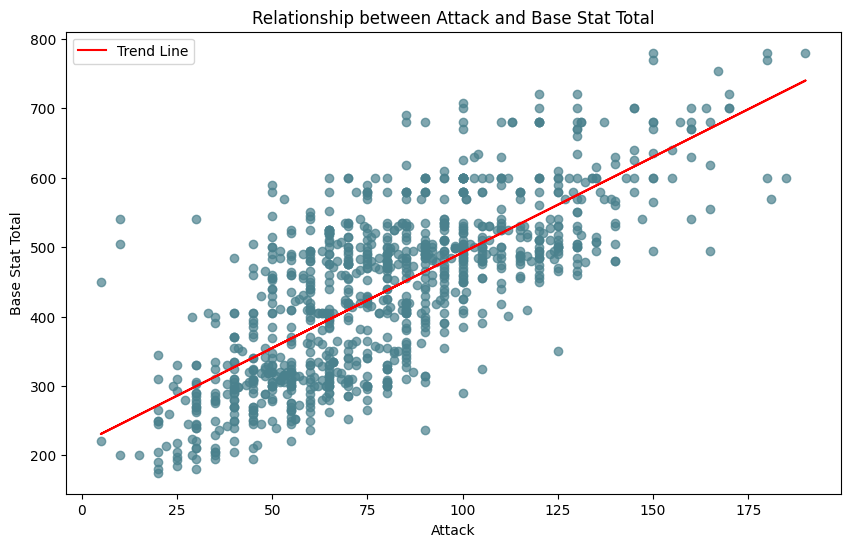

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(pokemon_data.attack, pokemon_data.base_stat_total, alpha=0.7, color='#4A818D')
plt.title("Relationship between Attack and Base Stat Total")
plt.xlabel("Attack")
plt.ylabel("Base Stat Total")
slope, intercept = np.polyfit(pokemon_data.attack, pokemon_data.base_stat_total, 1)
plt.plot(pokemon_data.attack, slope * pokemon_data.attack + intercept, color='red', label='Trend Line')
plt.legend()
plt.show()


### Observation
The scatter plot provides visual evidence confirming a strong positive correlation between **Attack** and **Base Stat Total (BST)**. As Attack values increase, Base Stat Total values tend to increase as well. This correlation suggests that Pokémon with higher Attack stats generally have higher overall Base Stat Totals, which might indicate a higher overall strength in battles.

### 2. Comparing Attack Distribution by Types
This plot illustrates the distribution of **Attack** stats across different Pokémon types. Each boxplot represents the spread and central tendency of Attack values for each type. The **x-axis** indicates the Attack values, while the **y-axis** represents the Pokémon types.

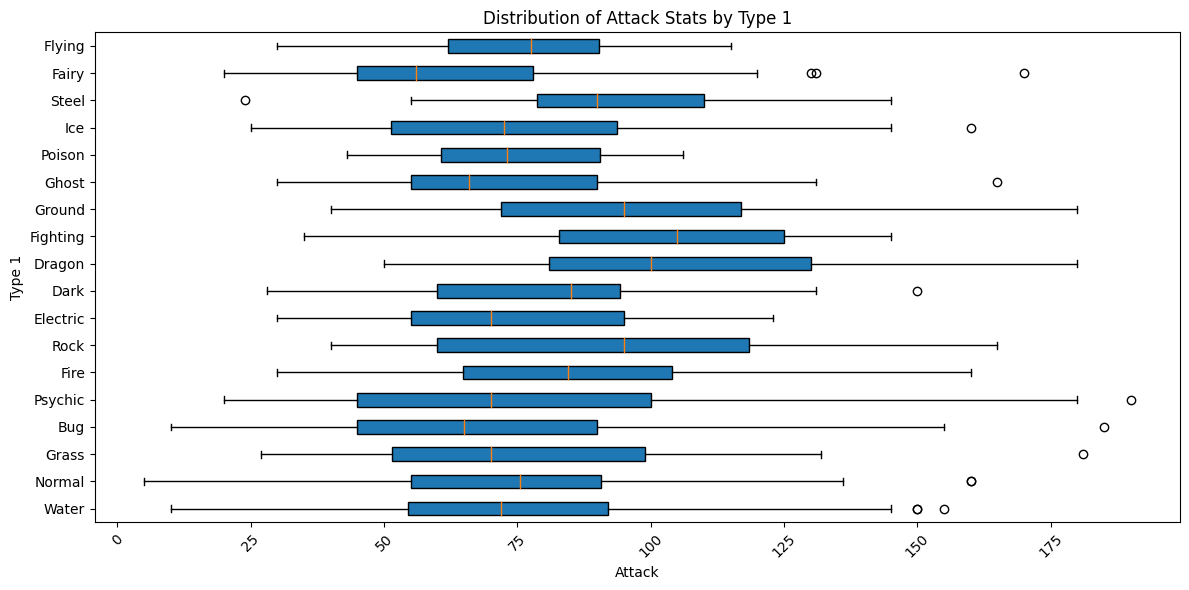

In [58]:
# Box plot of Attack values by Type 1
plt.figure(figsize=(12, 6))
plt.boxplot([pokemon_data[pokemon_data['type_1'] == i]['attack'] for i in count_by_type.index], vert=False, labels=count_by_type.index, patch_artist=True)
plt.title("Distribution of Attack Stats by Type 1")
plt.xlabel("Attack")
plt.ylabel("Type 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations:
1. **Steel, Fighting, Ground,** and **Dragon** types tend to have higher Attack values, suggesting that these Pokémon are more focused on offensive abilities.
2. **Fairy, Grass,** and **Poison** types exhibit lower Attack values, indicating a preference for other combat strategies.
3. **Water, Psychic,** and **Fire** types display a wide range of Attack values, indicating diverse combat strategies within these types.

### Hypothesis Test
Additionally, we perform a **two-sample t-test** to investigate whether there is a statistically significant difference in the mean Attack values between **Legendary** and **Non-Legendary Pokémon**. The **t-statistic** and **p-value** are calculated to determine the significance of this difference. If the p-value is below **0.05**, we conclude that there is a significant difference between the two groups.

In [127]:
legendary_attack = pokemon_data[pokemon_data['legendary'] == 1]['attack']
non_legendary_attack = pokemon_data[pokemon_data['legendary'] == 0]['attack']
t_stat, p_value = ttest_ind(legendary_attack, non_legendary_attack, equal_var=False)
print("Two-sample t-test between Legendary and Non-Legendary Pokémon:")
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("The difference in mean Attack values between Legendary and Non-Legendary Pokémon is statistically significant.")
else:
    print("There is no statistically significant difference in mean Attack values between Legendary and Non-Legendary Pokémon.")

Two-sample t-test between Legendary and Non-Legendary Pokémon:
t-statistic: 11.884597972490843
p-value: 1.204015146275267e-23
The difference in mean Attack values between Legendary and Non-Legendary Pokémon is statistically significant.


### 3. Understanding BMI Trends
This line plot showcases the average **Body Mass Index (BMI) trends** across different Pokémon generations. The x-axis represents the generations, while the **y-axis** represents the average BMI values. The plot provides an overview of how the average BMI varies across generations and helps identify any trends or patterns.

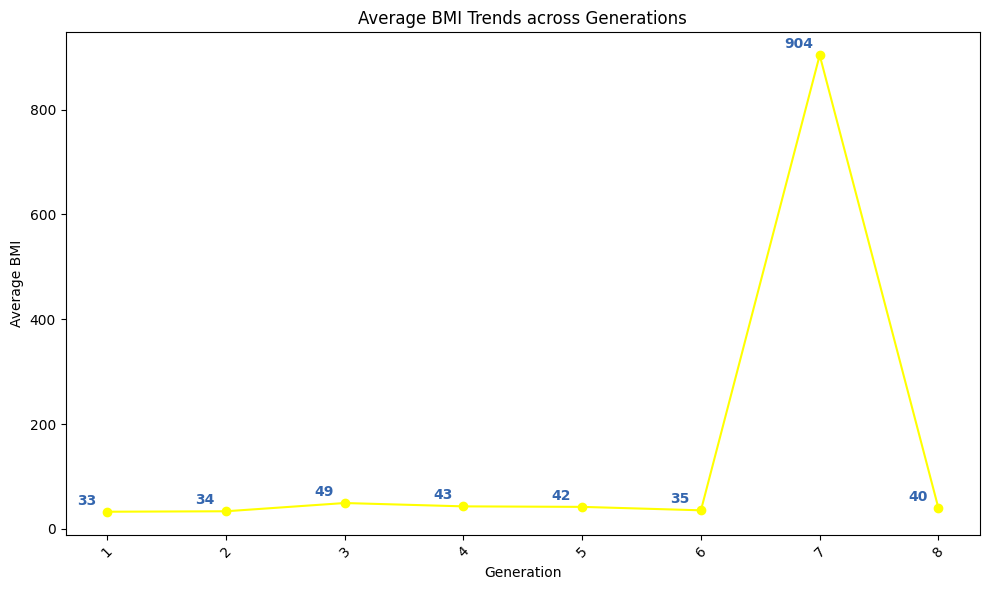

In [132]:
avg_bmi_by_generation = pokemon_data.groupby('generation')['bmi'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_bmi_by_generation.index, avg_bmi_by_generation.values, marker='o', color='Yellow')
plt.title("Average BMI Trends across Generations")
plt.xlabel("Generation")
plt.ylabel("Average BMI")
plt.xticks(rotation=45)

for x, y in zip(avg_bmi_by_generation.index, avg_bmi_by_generation.values):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(-15,5), ha='center', color='#3466AF', fontweight='bold')

plt.tight_layout()
plt.show()

This plot illustrates the average BMI trends across various Pokémon generations, with most generations maintaining a stable average around **30-50**. However, **Generation 7** stands as an outlier with an unusually high average BMI of **904**, indicating a distinctive trait or anomaly in that particular generation.

### 4. Impact of Mega Evolution on Strength
This bar chart displays the impact of **Mega Evolution** on the average **Base Stat Total** of Pokémon. The **x-axis** shows the categories "No Mega Evolution" and "Mega Evolution," while the **y-axis** represents the average Base Stat Total. The chart visually compares the strength of Pokémon with and without Mega Evolutions and offers insights into the influence of Mega Evolution on their overall strength.

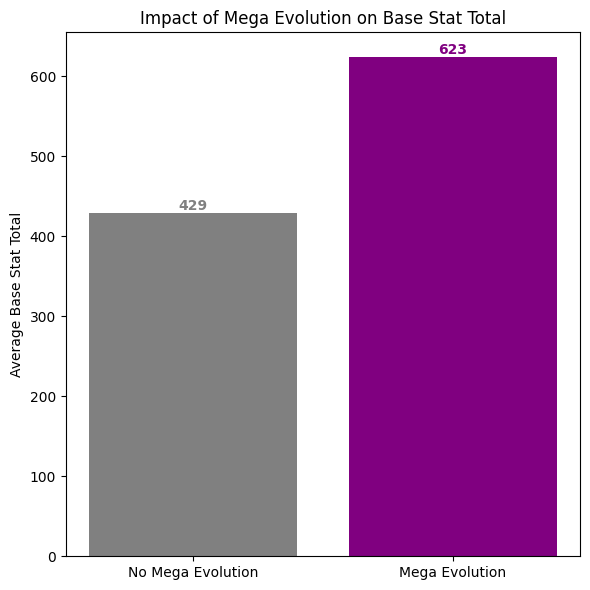

In [133]:
avg_bst_by_mega_evolution = pokemon_data.groupby('mega_evolution')['base_stat_total'].mean()
x_labels = ['No Mega Evolution', 'Mega Evolution']
plt.figure(figsize=(6, 6))
bar_chart2 = plt.bar(avg_bst_by_mega_evolution.index, avg_bst_by_mega_evolution.values, color=['gray', 'purple'])
plt.title("Impact of Mega Evolution on Base Stat Total")
plt.ylabel("Average Base Stat Total")
plt.xticks(avg_bst_by_mega_evolution.index, x_labels, rotation=0)
plt.tight_layout()
for bar in bar_chart2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom', color=bar.get_facecolor(), fontweight='bold')
plt.show()

The bar graph demonstrates a substantial difference in **average base stat total (BST)** between non-mega evolution Pokémon, with an average of **429**, and mega evolution Pokémon, with an average of **623**. his showcases a **45%** increase in overall strength.

### 5. Generational Evolution of Pokémon Attributes
This set of line plots explores the **generational evolution** of different Pokémon stats, including **HP, Attack, Defense, Speed, Special Attack,** and **Special Defense**. Each subplot illustrates the average value of a specific attribute across different generations. The **x-axis** represents the generations, while the **y-axis** indicates the average attribute values. This visualization enables us to identify trends and changes in attribute values as Pokémon evolve across generations.

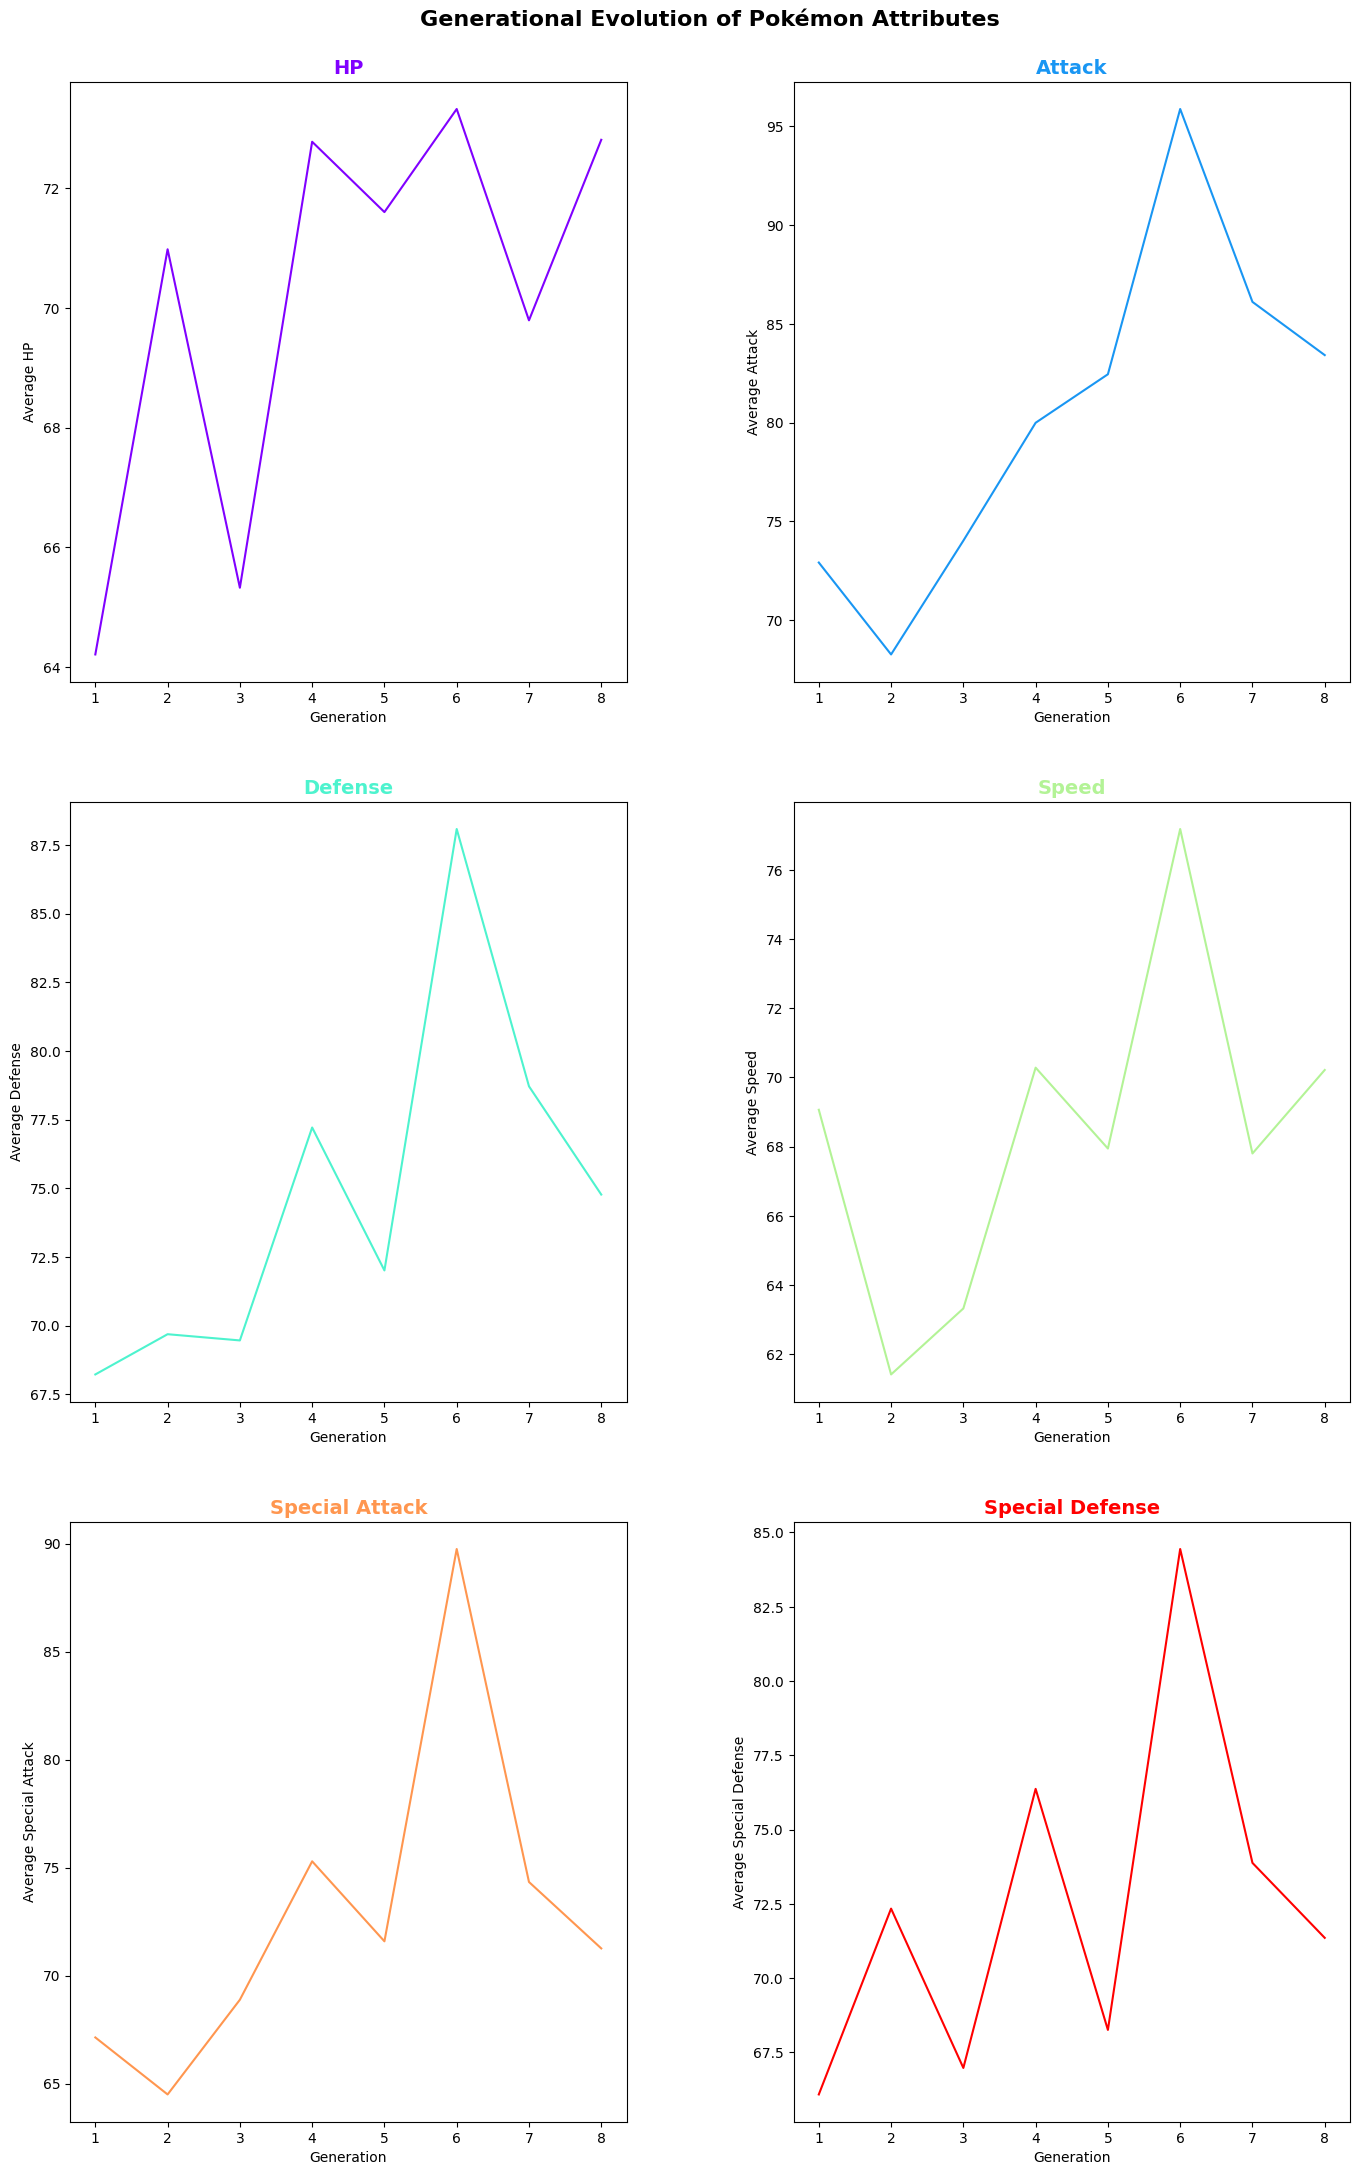

In [134]:
plt.figure(figsize=(16, 24))
stats_to_visualize = ['hp', 'attack', 'defense', 'speed', 'special_attack', 'special_defense']
stat_labels = ['HP', 'Attack', 'Defense', 'Speed', 'Special Attack', 'Special Defense']
generations = sorted(pokemon_data['generation'].unique())

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1, wspace=0.3, hspace=0.2)

for i, stat in enumerate(stats_to_visualize, 1):
    plt.subplot(3, 2, i)
    stat_values = [pokemon_data[pokemon_data['generation'] == gen][stat].mean() for gen in generations]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(stats_to_visualize)))
    plt.plot(generations, stat_values, label=stat, color=colors[i-1])
    plt.title(f"{stat_labels[i-1]}", fontsize=14, fontweight='bold', color=colors[i-1])
    plt.xlabel("Generation")
    plt.ylabel("Average " + stat_labels[i-1])

plt.suptitle("Generational Evolution of Pokémon Attributes", y=0.98, fontsize=16, fontweight='bold')

plt.show()

### Conclusion
In conclusion, our exploration in the **"Pokémon Insights: Delving into Attribute Data"** Jupyter Notebook has provided us with valuable insights into the intricate world of Pokémon attributes and statistics. Through meticulous analysis and visualization, we've gained a comprehensive understanding of various aspects of Pokémon characteristics. Let's summarize the key takeaways from our journey:

**- Diverse Pokémon Types**: Our investigation into the distribution of Pokémon types highlighted the prevalence of Water, Normal, and Grass types, constituting a significant portion of the dataset. Conversely, Ice, Steel, Fairy, and Flying types emerged as comparatively rare categories.

**- Interconnected Stats**: Through correlation analysis, we discovered compelling relationships among various attributes. Notably, **HP, Attack, and Special Attack** exhibited strong correlations, indicating their interconnectedness in influencing overall strength.

**- Combat Strategies**: An exploration of Attack distributions across different Pokémon types unveiled distinct battling strategies. Types such as **Steel, Fighting, Ground,** and **Dragon** demonstrated higher Attack values, suggesting an offensive focus. In contrast, **Fairy, Grass,** and **Poison** types displayed lower Attack values, implying alternative combat approaches.

**- Mega Evolution Impact**: The introduction of Mega Evolution showcased a significant **45% increase** in the average Base Stat Total of Pokémon embracing this transformation. This phenomenon highlighted the transformative impact of Mega Evolution on a Pokémon's overall strength.

**- Generational Evolution**: The generational analysis of Pokémon attributes revealed dynamic trends. The fluctuations in **HP and Speed** values across generations illustrated the evolutionary trajectory of these attributes over time.

Our journey into the realm of Pokémon attributes has not only enhanced our analytical skills but also deepened our appreciation for the intricate details that shape the Pokémon universe. As we conclude this exploration, we recognize that data analysis is a potent tool that can unveil valuable insights even within fictional realms. As we venture forward in our data analysis endeavors, let us remain curious and dedicated to uncovering hidden truths, whether they reside in statistical data or imaginative narratives.